In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/googleplaystore.csv'
df = pd.read_csv(path)

df.describe

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
fig = df.hist(column="Rating")

In [ ]:
df[df['Rating'].gt(5)].index[0]

10472

In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2.drop(df2.index[10472])

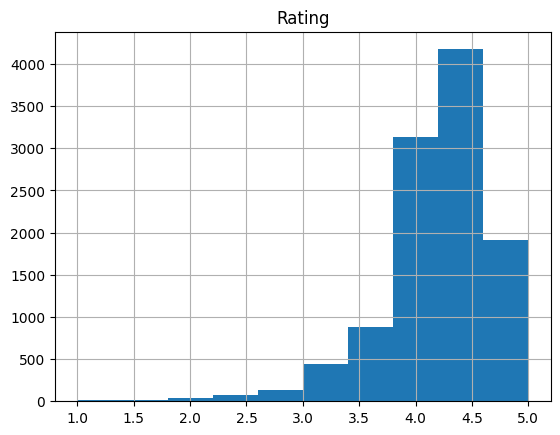

In [ ]:
fig = df2.hist(column="Rating")

In [ ]:
df2 = df2.fillna(value=df2["Rating"].mean())

In [ ]:
df2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
df2.describe()

,Rating
count,10840.000000
mean,4.191757
std,0.478907
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,5.000000


In [ ]:
df2["Reviews"] = df2["Reviews"].astype(str).astype(int)

In [ ]:
df2.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df2["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
import numpy as np

df2["Size"] = df2["Size"].str.replace("M", "000")
df2["Size"] = df2["Size"].str.replace("k", "")
df2["Size"] = df2["Size"].replace("Varies with device", np.nan)

df2["Size"] = df2["Size"].astype(float)

df2["Size"]

NameError: ignored

In [ ]:
df2 = df2.rename(columns = {"Size" : "Size(KB)"})

In [ ]:
df2.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size(KB)                 float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [ ]:
df2.describe()

,Rating,Reviews,Size
count,10840.000000,1.084000e+04,9145.000000
mean,4.191757,4.441529e+05,19579.419913
std,0.478907,2.927761e+06,24042.062020
min,1.000000,0.000000e+00,1.000000
25%,4.100000,3.800000e+01,5.600000
50%,4.200000,2.094000e+03,13000.000000
75%,4.500000,5.477550e+04,30000.000000
max,5.000000,7.815831e+07,100000.000000


In [ ]:
df2["Size"].isnull().sum()

1695

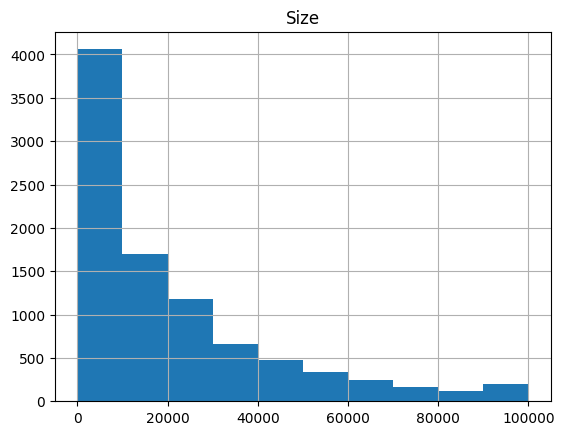

In [ ]:
fig2 = df2.hist(column="Size")

In [ ]:
df2 = df2.fillna(method= "pad")

In [ ]:
df2["Price"] = df2["Price"].str.replace("$", "")

<ipython-input-44-f840c71d77d0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Price"] = df2["Price"].str.replace("$", "")


In [ ]:
df2["Price"] = df2["Price"].astype(float)

In [ ]:
df2.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df2["Installs"] = df2["Installs"].str.replace("+", "")
df2["Installs"] = df2["Installs"].str.replace(".", ",")

<ipython-input-55-24a57c3b3515>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Installs"] = df2["Installs"].str.replace("+", "")
<ipython-input-55-24a57c3b3515>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Installs"] = df2["Installs"].str.replace(".", ",")


In [ ]:
df2["Installs"].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [ ]:
df2['Installs'] = df2['Installs'].str.replace(',', '').astype(int)

In [ ]:
df2['Last Updated'] = pd.to_datetime(df2['Last Updated'])

In [ ]:
df2.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
